# Индивидуальное задание

Импортируем необходимые библиотеки, и прописываем функции ввода изображения и вывода

In [38]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

In [39]:
def img_input(img_path, size=(0,0), type=1):
    img = cv2.imread(img_path,type)
    if type == 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if size != (0,0):
            img = cv2.resize(img, size)
            return img
        else:
            return img
    else:
        if size != (0,0):
            img = cv2.resize(img, size)
            return img
        else:
            return img

In [40]:
def img_print(images, titles, row_and_colm=(0,0), hard_type='None'):
    num_of_img = len(images)
    if hard_type == 'None':
        for i in range(num_of_img):
            if row_and_colm == (0,0):
                plt.subplot(1,num_of_img,i+1),plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
            else:
                plt.subplot(row_and_colm[0],row_and_colm[1],i+1),plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
        plt.show ()

    else:
        for i in range(num_of_img):
            if row_and_colm == (0,0):
                plt.subplot(1,num_of_img,i+1),plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
            else:
                plt.subplot(row_and_colm[0],row_and_colm[1],i+1),plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
        plt.show ()

### Выбрать изображение, провести сглаживание изображения используя методы cv2.filter2D(), cv2.blur() используя ядро 6x6. Создать на выбранном изображении шумы, и для зашумлённого изображения произвести медианную фильтрацию и фильтрацию по Гауссу. Найти горизонтальные и вертикальные линии для выбранного изображения используя методы Собела, Превитта и перепады изображения по методу Лапласа.

Загружаем изображение

In [41]:
image = img_input('pic/Ind12.jpg')

Произведём сглаживание выбранного изображения

1) Сглаживание при помощи функции cv2.filter2D()

In [42]:
kernel = np.ones((6,6),np.float32)/36
sglaj_2D = cv2.filter2D(image,-1,kernel)

2) Сглаживание при помощи функции cv2.blur()

In [43]:
sglaj_blur = cv2.blur(image,(6,6))

Создадим синие, желтый и красные пиксели

In [44]:
red, green, blue = (255, 0, 0), (0, 255, 0), (0, 0,255)
rgb = [red, green, blue]

Функция создания шумов на изображении

In [45]:
def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn > thres:
                output[i][j] = random.choice(rgb)
            else:
                output[i][j] = image[i][j]

    return output

Создаём шумы

In [46]:
noise_img = sp_noise(image, 0.4)

Произведем фильтрацию зашумленного изображения по Гауссу (ядро 5x5):

In [47]:
gaus_blur = cv2.GaussianBlur(image,(5,5), 0)

Медианная фильтрация (ядро 5x5):

In [48]:
median_blur = cv2.medianBlur(image,5)

Найдём горизонтальные линии по методу Собела, а вертикальные по методу Превитта

1) Горизонтальные линии по методу Собела

In [49]:
sobel_vertical = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5);

2) Вертикальные линии по методу Превитта

In [50]:
x_mask = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
img_prewittx = cv2.filter2D(image, -1, x_mask)

Найдём перепады изображения по методу Лапласа

In [51]:
laplacian = cv2.Laplacian(image, cv2.CV_64F)

Выведем результат:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


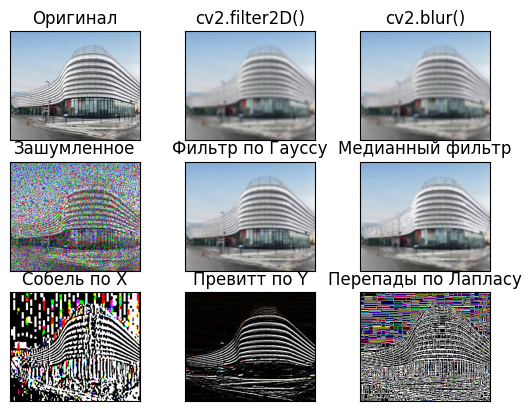

In [52]:
res = [image, sglaj_2D, sglaj_blur, noise_img, gaus_blur, median_blur, sobel_vertical, img_prewittx, laplacian]
title = ['Оригинал','cv2.filter2D()','cv2.blur()','Зашумленное','Фильтр по Гауссу','Медианный фильтр','Собель по Y','Превитт по X','Перепады по Лапласу']

img_print(res, title, row_and_colm=(3,3))